In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [134]:
metadata = pd.read_pickle('cifar-10-batches/batches.meta')
batch_1 = pd.read_pickle('cifar-10-batches/data_batch_1')
X = (np.array(batch_1[b'data'], 'float')/255).T
Y = np.array(batch_1[b'labels']).T
m = 10000
n = 1024

In [135]:
def init_params():
    W1 = np.random.rand(10, 1024) * 0.01
    b1 = np.random.rand(10, 1) * 0.01
    W2 = np.random.rand(10, 10) * 0.01
    b2 = np.random.rand(10, 1) * 0.01
    W3 = np.random.rand(10, 10) * 0.01
    b3 = np.random.rand(10, 1) * 0.01
    return W1, b1, W2, b2, W3, b3

In [136]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [137]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
def Sigmoid(Z):
    return (1/(1 + np.exp(-Z)))

    

In [138]:
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

In [139]:
def compute_cost(Y ,A3):
    cost = np.multiply(np.log(A3), Y) + np.multiply(1 - Y, np.log(1 - A3))
    #cost = (-1 / m) * (np.sum(((Y) @ np.log(A2)) + (((1 - Y) @ np.log(1 - A2)))))
    return np.sum(cost)/(-m)

In [140]:
def ReLU_deriv(Z):
    return Z > 0
def Sigmoid_deriv(Z):
    return (Sigmoid(Z) * (1 - Sigmoid(Z)))

In [141]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [142]:
def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot(Y)
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2, dW3, db2

In [143]:
def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2  
    W3 = W3 - alpha * dW3  
    b3 = b3 - alpha * db3  
    return W1, b1, W2, b2, W3, b3

In [144]:
def get_predictions(A2):
    return np.argmax(A2, 0)


In [145]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [146]:
def gradient_descent(X, Y, alpha, iterations,k ,W1, b1, W2, b2, W3, b3):
    if k == 0:
        W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations+1):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 5000 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A3)
            qwe = one_hot(Y)
            print(get_accuracy(predictions, Y),' Cost = ', compute_cost(qwe, A3))
    return W1, b1, W2, b2, W3, b3

In [147]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X, Y, 0.1, 50000, 0, None, None, None, None, None, None)


Iteration:  0
[4 4 4 ... 4 4 4] [6 9 9 ... 1 1 5]
0.0999  Cost =  3.250777394816271
Iteration:  5000
[1 8 9 ... 9 1 5] [6 9 9 ... 1 1 5]
0.2993  Cost =  2.815282537254396
Iteration:  10000
[6 1 9 ... 1 8 5] [6 9 9 ... 1 1 5]
0.3744  Cost =  2.611302846823668
Iteration:  15000
[6 1 9 ... 1 7 4] [6 9 9 ... 1 1 5]
0.3604  Cost =  2.6385581030664724
Iteration:  20000
[6 1 9 ... 1 8 4] [6 9 9 ... 1 1 5]
0.4083  Cost =  2.489292731659473
Iteration:  25000
[6 8 9 ... 1 8 5] [6 9 9 ... 1 1 5]
0.398  Cost =  2.501751700457336
Iteration:  30000
[6 1 9 ... 1 1 3] [6 9 9 ... 1 1 5]
0.4084  Cost =  2.445495198044086
Iteration:  35000
[6 1 9 ... 1 8 4] [6 9 9 ... 1 1 5]
0.4191  Cost =  2.412834208678061
Iteration:  40000
[6 1 9 ... 1 1 5] [6 9 9 ... 1 1 5]
0.4252  Cost =  2.380102726811698
Iteration:  45000
[6 1 9 ... 1 8 5] [6 9 9 ... 1 1 5]
0.4451  Cost =  2.3234036980046997
Iteration:  50000
[6 8 9 ... 1 1 5] [6 9 9 ... 1 1 5]
0.4173  Cost =  2.4103213830231733


In [149]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X, Y, 0.1, 5000, 1, W1, b1, W2, b2, W3, b3)

Iteration:  0
[6 1 9 ... 1 8 2] [6 9 9 ... 1 1 5]
0.4293  Cost =  2.3763072285238116
Iteration:  5000
[6 1 9 ... 1 1 2] [6 9 9 ... 1 1 5]
0.436  Cost =  2.343871750934228


In [158]:
namethings = np.array(metadata['label_names'])
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(imagee, W1, b1, W2, b2, W3, b3):
    current_image = X[:, imagee, None]
    prediction = make_predictions(X[:, imagee, None], W1, b1, W2, b2, W3, b3)
    label = Y[i]
    print("Prediction: ", namethings[prediction])
    print("Label: ", namethings[label])
    
    current_image = current_image.reshape((32, 32)) * 255
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  ['frog']
Label:  frog


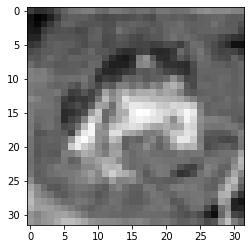

Prediction:  ['automobile']
Label:  truck


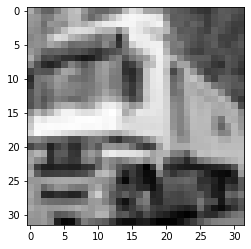

Prediction:  ['truck']
Label:  truck


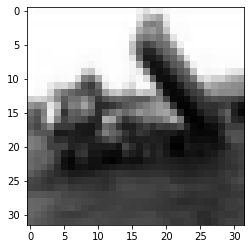

Prediction:  ['frog']
Label:  deer


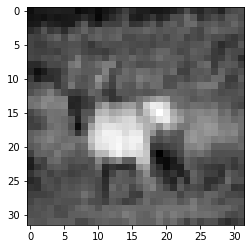

Prediction:  ['automobile']
Label:  automobile


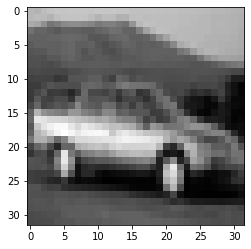

Prediction:  ['automobile']
Label:  automobile


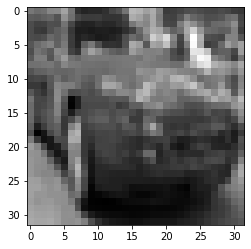

Prediction:  ['bird']
Label:  bird


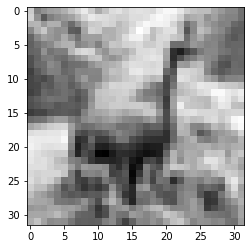

Prediction:  ['horse']
Label:  horse


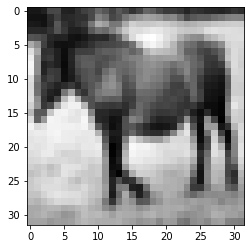

Prediction:  ['cat']
Label:  ship


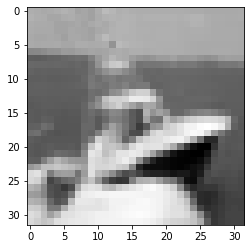

Prediction:  ['deer']
Label:  cat


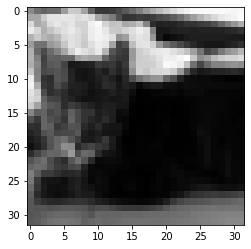

Prediction:  ['frog']
Label:  deer


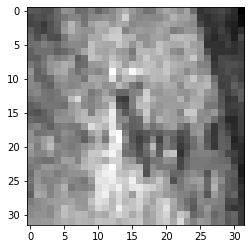

Prediction:  ['horse']
Label:  horse


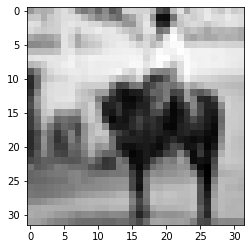

Prediction:  ['horse']
Label:  horse


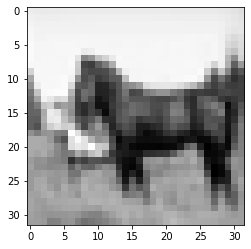

Prediction:  ['horse']
Label:  bird


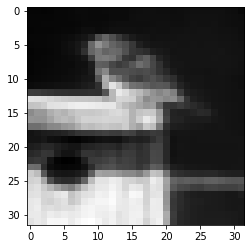

Prediction:  ['truck']
Label:  truck


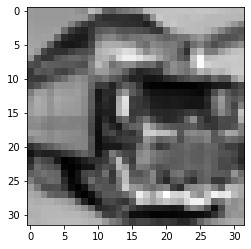

Prediction:  ['horse']
Label:  truck


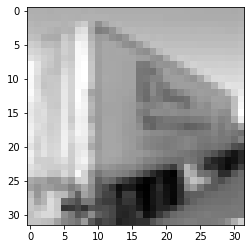

Prediction:  ['truck']
Label:  truck


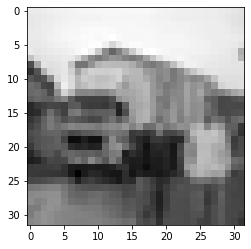

Prediction:  ['dog']
Label:  cat


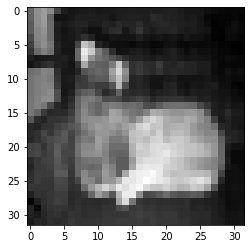

Prediction:  ['cat']
Label:  bird


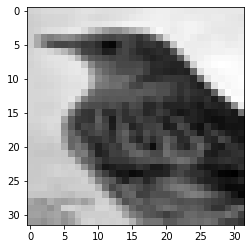

Prediction:  ['frog']
Label:  frog


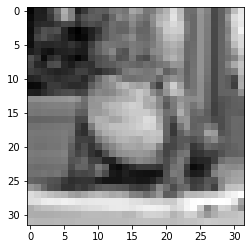

Prediction:  ['airplane']
Label:  deer


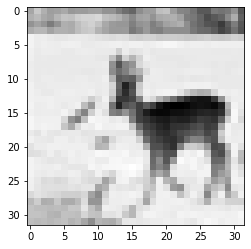

Prediction:  ['bird']
Label:  cat


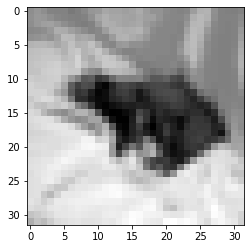

Prediction:  ['frog']
Label:  frog


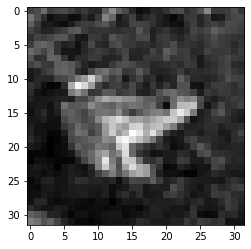

Prediction:  ['frog']
Label:  frog


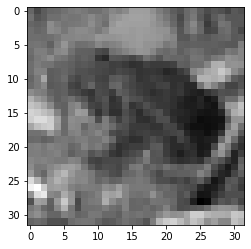

Prediction:  ['frog']
Label:  bird


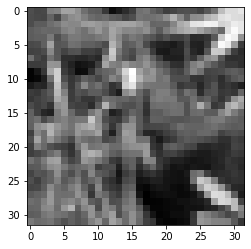

Prediction:  ['frog']
Label:  frog


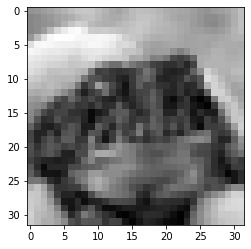

Prediction:  ['truck']
Label:  cat


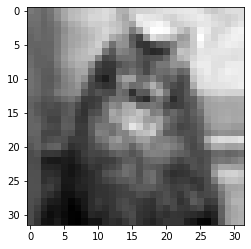

Prediction:  ['frog']
Label:  dog


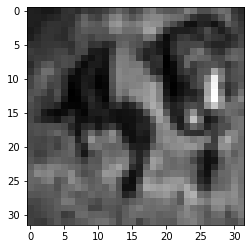

Prediction:  ['horse']
Label:  deer


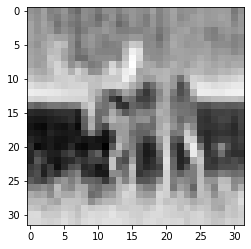

Prediction:  ['bird']
Label:  airplane


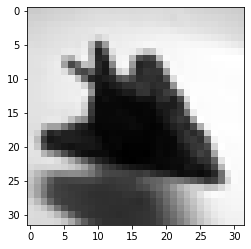

Prediction:  ['frog']
Label:  airplane


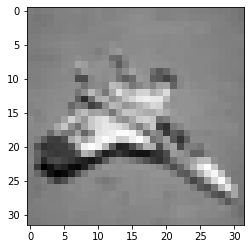

Prediction:  ['ship']
Label:  truck


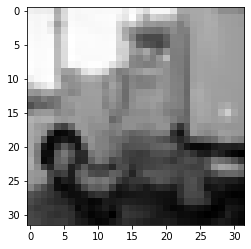

Prediction:  ['automobile']
Label:  automobile


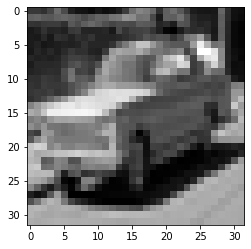

Prediction:  ['dog']
Label:  cat


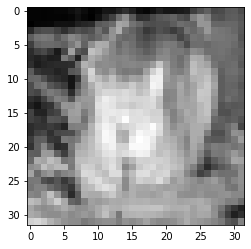

Prediction:  ['deer']
Label:  deer


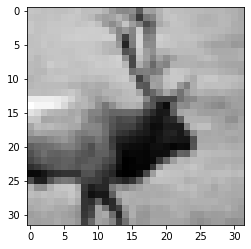

Prediction:  ['horse']
Label:  airplane


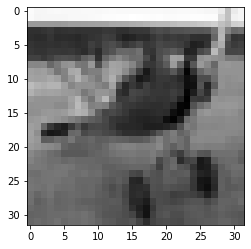

Prediction:  ['cat']
Label:  cat


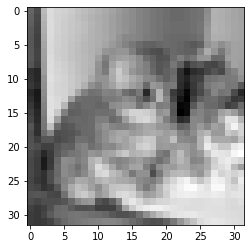

Prediction:  ['horse']
Label:  horse


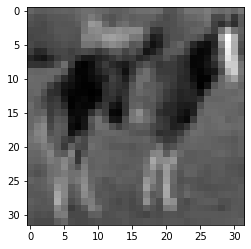

Prediction:  ['cat']
Label:  cat


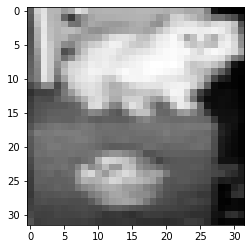

Prediction:  ['dog']
Label:  cat


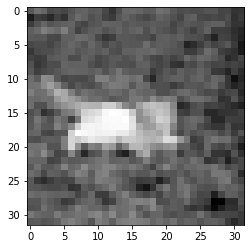

Prediction:  ['ship']
Label:  dog


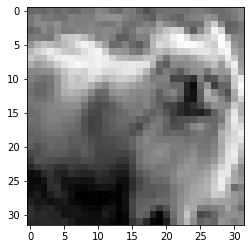

Prediction:  ['deer']
Label:  bird


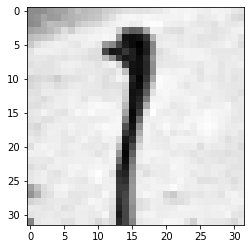

Prediction:  ['bird']
Label:  bird


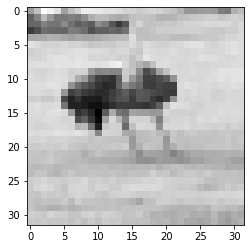

Prediction:  ['horse']
Label:  horse


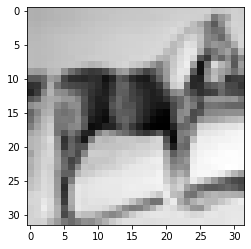

Prediction:  ['automobile']
Label:  automobile


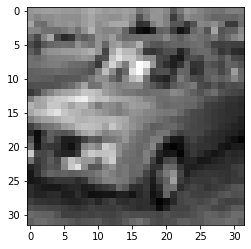

Prediction:  ['automobile']
Label:  automobile


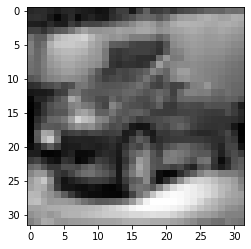

Prediction:  ['automobile']
Label:  automobile


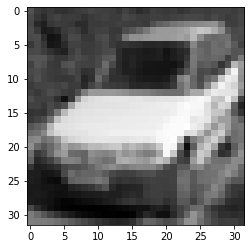

Prediction:  ['frog']
Label:  bird


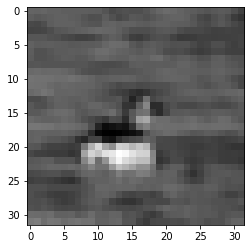

Prediction:  ['deer']
Label:  bird


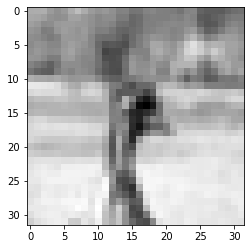

Prediction:  ['airplane']
Label:  airplane


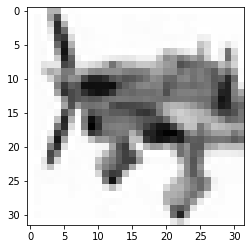

Prediction:  ['deer']
Label:  truck


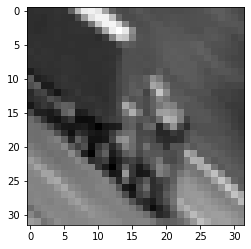

Prediction:  ['frog']
Label:  dog


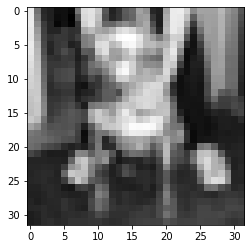

Prediction:  ['deer']
Label:  horse


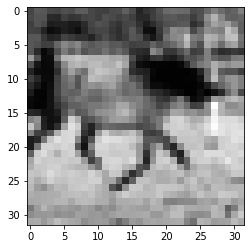

Prediction:  ['automobile']
Label:  truck


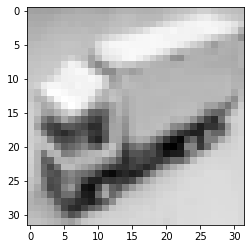

Prediction:  ['frog']
Label:  bird


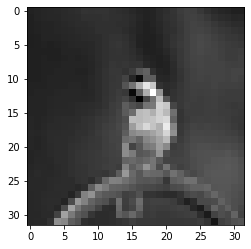

Prediction:  ['bird']
Label:  bird


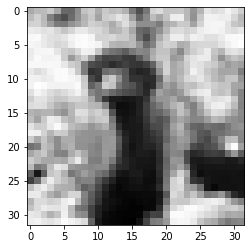

Prediction:  ['dog']
Label:  dog


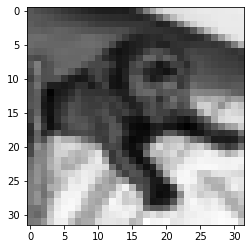

Prediction:  ['automobile']
Label:  bird


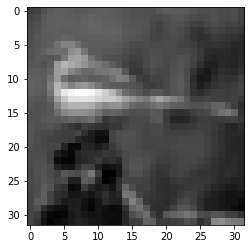

Prediction:  ['deer']
Label:  deer


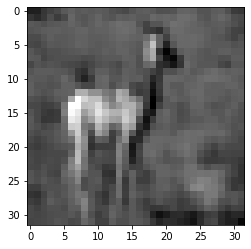

Prediction:  ['horse']
Label:  cat


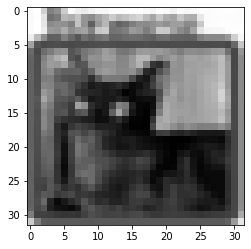

Prediction:  ['automobile']
Label:  automobile


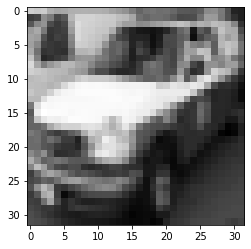

In [159]:
for i in range(0, 61):
    test_prediction(i, W1, b1, W2, b2, W3, b3)